<a href="https://colab.research.google.com/github/Patrick-Sinnott/Machine-Learning-Ising-Model---Python-Project-Work-in-Progress-/blob/main/Python_Project_Ising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9 0.0 0.01460039505404666 0.0


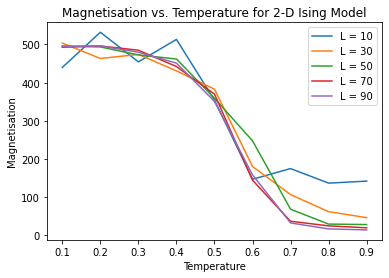

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

#create initial array of spin-up particles
def Ising(rows,cols):
  return np.random.rand(rows,cols)

#calcuating the nearest neighbours
def find_neighbors(array, lattice, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % lattice)
    top    = (x - 1, y)
    bottom = ((x + 1) % lattice, y)

    return [array[left[0], left[1]],
            array[right[0], right[1]],
            array[top[0], top[1]],
            array[bottom[0], bottom[1]]]

#calculating the energy of the configuration
def energy(array, lattice, x ,y):
    return 2 * array[x, y] * sum(find_neighbors(array, lattice, x, y))



#defining the number of initial sweeps, the lattice size, and number of monte carlo sweeps
RELAX_SWEEPS = 50
lattice = 10
sweeps = 1000
e1= e0 = 0
mags = ([[],[],[],[],[]])
temps = ([[],[],[],[],[]])

for q in range(5):
  lattice = q*20 + 10
  for temperature in np.arange(0.1, 1.0, 0.1):
    #setting up initial variables
    array = Ising(lattice, lattice)
    mag = np.zeros(sweeps + RELAX_SWEEPS)
    temp = np.zeros(sweeps + RELAX_SWEEPS)
    Energy = np.zeros(sweeps + RELAX_SWEEPS)
    #Metropolis
    for sweep in range(sweeps + RELAX_SWEEPS):
        for i in range(lattice):
            for j in range(lattice):
                e = energy(array, lattice, i, j)
                if e <= 0:
                      array[i, j] *= -1
                elif np.exp((-1.0 * e)/temperature) > random.random():
                      array[i, j] *= -1
           
            

          #Magnetization
        mag[sweep] = abs(sum(sum(array))) / (lattice ** 2)

      
    temps[q].append(temperature)
    mags[q].append(sum(mag[RELAX_SWEEPS:]))
    
  
print(temperature,sum(Energy[RELAX_SWEEPS:]) / sweeps, sum(mag[RELAX_SWEEPS:]) / sweeps,sum(temp[RELAX_SWEEPS:]) / sweeps)

label = [10,30,50,70,90]
for q in range(5):
  plt.plot(temps[q],mags[q],label = 'L = '+str(label[q]))

plt.title('Magnetisation vs. Temperature for 2-D Ising Model')
plt.xlabel('Temperature') 
plt.ylabel('Magnetisation')
plt.legend()